# 🧪 Exploration des Données – Projet Machine Learning LoL

Ce notebook a pour objectif de réaliser une première exploration des données brutes du projet.  
Nous allons :

- charger les différentes tables
- inspecter leur structure
- analyser les types de données
- vérifier la cohérence (clés, valeurs manquantes, doublons)
- visualiser quelques distributions
- identifier les liens entre les tables
- préparer les décisions pour le nettoyage et la fusion dans le Notebook 02

---


In [54]:
%matplotlib inline
import matplotlib
print(matplotlib.get_backend())


inline


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = "../data/raw/"

champions = pd.read_csv(path + "ChampionTbl.csv")
items = pd.read_csv(path + "ItemTbl.csv")
matches = pd.read_csv(path + "MatchTbl.csv")
matchstats = pd.read_csv(path + "MatchStatsTbl.csv")
rank = pd.read_csv(path + "RankTbl.csv")
summonerm = pd.read_csv(path + "SummonerMatchTbl.csv")
teammatch = pd.read_csv(path + "TeamMatchTbl.csv")

champions.head()


,ChampionId,ChampionName
0,0,No Champion
1,1,Annie
2,2,Olaf
3,3,Galio
4,4,TwistedFate


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "../data/raw/"

champions   = pd.read_csv(path + "ChampionTbl.csv")
items       = pd.read_csv(path + "ItemTbl.csv")
matches     = pd.read_csv(path + "MatchTbl.csv")
matchstats  = pd.read_csv(path + "MatchStatsTbl.csv")
rank        = pd.read_csv(path + "RankTbl.csv")
summonerm   = pd.read_csv(path + "SummonerMatchTbl.csv")
teammatch   = pd.read_csv(path + "TeamMatchTbl.csv")


## 1. Aperçu rapide des tables

Nous inspectons la taille de chaque table pour comprendre le volume de données disponible.


In [56]:
tables = {
    "Champions": champions,
    "Items": items,
    "MatchTbl": matches,
    "MatchStatsTbl": matchstats,
    "SummonerMatchTbl": summonerm,
    "TeamMatchTbl": teammatch,
    "RankTbl": rank
}

for name, df in tables.items():
    print(f"--- {name} ---")
    print(df.shape)
    display(df.head(3))
    print("\n")


--- Champions ---
(172, 2)


,ChampionId,ChampionName
0,0,No Champion
1,1,Annie
2,2,Olaf




--- Items ---
(635, 2)


,ItemID,ItemName
0,1001,Boots
1,1004,Faerie Charm
2,1006,Rejuvenation Bead




--- MatchTbl ---
(69416, 5)


,MatchId,Patch,QueueType,RankFk,GameDuration
0,EUN1_3707659547,14.23.636.9832,ARAM,0,1173
1,EUN1_3709211408,14.24.642.1879,CLASSIC,0,1986
2,EUN1_3710823249,14.24.643.5128,ARAM,0,813




--- MatchStatsTbl ---
(150505, 31)


,MatchStatsId,SummonerMatchFk,MinionsKilled,DmgDealt,DmgTaken,TurretDmgDealt,TotalGold,Lane,Win,item1,...,PrimarySlot3,SecondarySlot1,SecondarySlot2,SummonerSpell1,SummonerSpell2,CurrentMasteryPoints,EnemyChampionFk,DragonKills,BaronKills,visionScore
0,1,1,30,4765,12541,0,7058,BOTTOM,0,3870,...,8453,8345,8347,4,7,902,51,0,0,67
1,2,2,29,8821,14534,1,9618,BOTTOM,0,3870,...,8453,8345,8347,4,7,902,236,0,0,88
2,3,3,34,6410,19011,3,9877,BOTTOM,1,3870,...,8237,8345,8347,4,7,16,498,0,0,97




--- SummonerMatchTbl ---
(150505, 4)


,SummonerMatchId,SummonerFk,MatchFk,ChampionFk
0,1,1,EUW1_7565751492,902
1,2,1,EUW1_7565549583,902
2,3,1,EUW1_7564803077,16




--- TeamMatchTbl ---
(68676, 24)


,TeamID,MatchFk,B1Champ,B2Champ,B3Champ,B4Champ,B5Champ,R1Champ,R2Champ,R3Champ,...,BlueDragonKills,BlueTowerKills,BlueKills,RedBaronKills,RedRiftHeraldKills,RedDragonKills,RedTowerKills,RedKills,RedWin,BlueWin
0,1,EUW1_7565751492,897,154,157,51,902,164,5,25,...,1,3,13,1,0,3,8,26,1,0
1,2,EUW1_7565549583,82,238,157,236,89,6,254,127,...,3,10,39,0,1,1,3,33,0,1
2,3,EUW1_7564803077,516,28,4,498,235,23,64,38,...,2,7,27,2,0,3,8,37,1,0




--- RankTbl ---
(11, 2)


,RankId,RankName
0,0,Unranked
1,1,Iron
2,2,Bronze


In [57]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

path = "../data/raw/"
matches = pd.read_csv(path + "MatchTbl.csv")
matchstats = pd.read_csv(path + "MatchStatsTbl.csv")


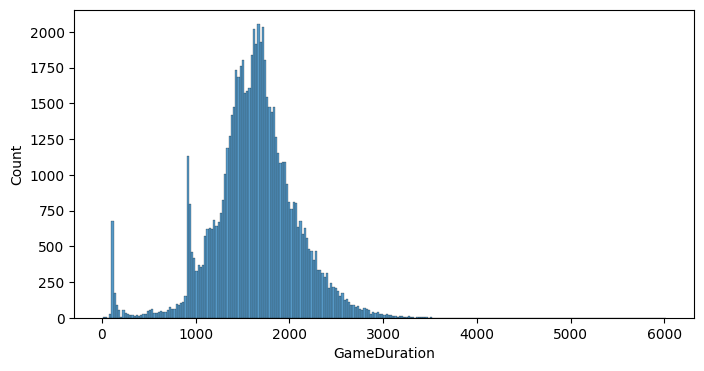

In [58]:
plt.figure(figsize=(8,4))
sns.histplot(matches['GameDuration'])
plt.show()


## 2. Analyse des valeurs manquantes

Objectif :
- repérer les colonnes incomplètes
- anticiper le traitement dans le notebook de nettoyage


In [59]:
for name, df in tables.items():
    print(f"--- {name} ---")
    display(df.isnull().mean().sort_values(ascending=False).head(10))
    print("\n")


--- Champions ---


ChampionId      0.0
ChampionName    0.0
dtype: float64



--- Items ---


ItemID      0.0
ItemName    0.0
dtype: float64



--- MatchTbl ---


MatchId         0.0
Patch           0.0
QueueType       0.0
RankFk          0.0
GameDuration    0.0
dtype: float64



--- MatchStatsTbl ---


MatchStatsId       0.0
SummonerMatchFk    0.0
MinionsKilled      0.0
DmgDealt           0.0
DmgTaken           0.0
TurretDmgDealt     0.0
TotalGold          0.0
Lane               0.0
Win                0.0
item1              0.0
dtype: float64



--- SummonerMatchTbl ---


SummonerMatchId    0.0
SummonerFk         0.0
MatchFk            0.0
ChampionFk         0.0
dtype: float64



--- TeamMatchTbl ---


TeamID     0.0
MatchFk    0.0
B1Champ    0.0
B2Champ    0.0
B3Champ    0.0
B4Champ    0.0
B5Champ    0.0
R1Champ    0.0
R2Champ    0.0
R3Champ    0.0
dtype: float64



--- RankTbl ---


RankId      0.0
RankName    0.0
dtype: float64

## 3. Exploration Statistique

On visualise quelques distributions importantes :

- durée des matchs
- kills par équipe
- dégâts infligés par joueur
- minions tués


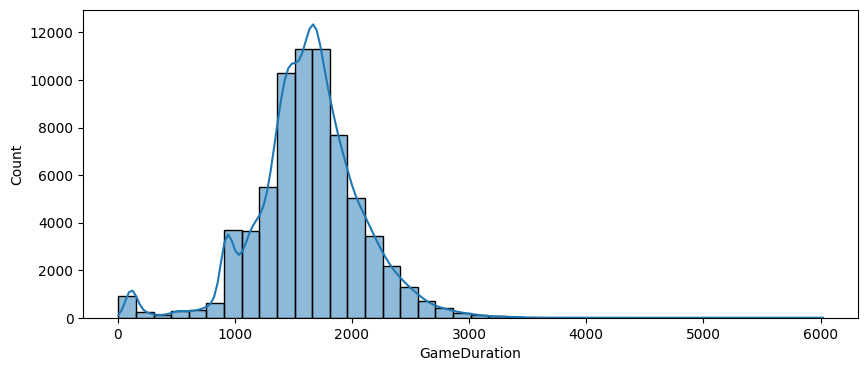

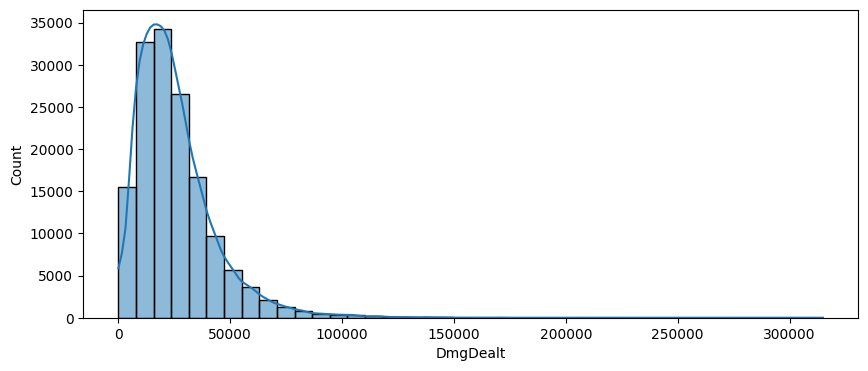

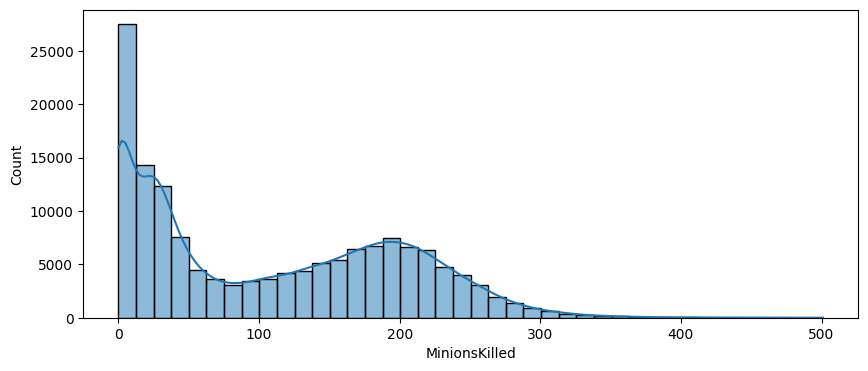

In [60]:
plt.figure(figsize=(10,4))
sns.histplot(matches['GameDuration'], bins=40, kde=True)
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(matchstats['DmgDealt'], bins=40, kde=True)
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(matchstats['MinionsKilled'], bins=40, kde=True)
plt.show()


## 4. Relations entre les tables

Nous examinons les clés principales :

- `MatchId`  
- `SummonerMatchFk` (lien entre joueur et stats)
- `TeamMatchId`
- `ChampionId`
- `ItemId`

But :
- comprendre comment fusionner correctement les tables
- vérifier l’intégrité référentielle


In [61]:
print("SummonerMatchTbl → MatchStatsTbl :")
print(matchstats["SummonerMatchFk"].isin(summonerm["SummonerMatchId"]).mean())

print("\nSummonerMatchTbl → MatchTbl :")
print(summonerm["MatchFk"].isin(matches["MatchId"]).mean())


SummonerMatchTbl → MatchStatsTbl :
1.0

SummonerMatchTbl → MatchTbl :
1.0


In [62]:
# Joueur ↔ Match (table “longue” centrée joueur)
summ_match = summonerm.merge(matches, left_on='MatchFk', right_on='MatchId', how='inner')

# Stats joueur ↔ Joueur ↔ Match
player_stats = matchstats.merge(summonerm, left_on='SummonerMatchFk', right_on='SummonerMatchId', how='inner') \
                        .merge(matches, left_on='MatchFk', right_on='MatchId', how='inner')

# Équipe ↔ Match (centrée équipe)
team_match = teammatch.merge(matches, left_on='MatchFk', right_on='MatchId', how='inner')

summ_match.head()


,SummonerMatchId,SummonerFk,MatchFk,ChampionFk,MatchId,Patch,QueueType,RankFk,GameDuration
0,1,1,EUW1_7565751492,902,EUW1_7565751492,15.20.717.2831,CLASSIC,7,1751
1,2,1,EUW1_7565549583,902,EUW1_7565549583,15.20.717.2831,CLASSIC,7,2092
2,3,1,EUW1_7564803077,16,EUW1_7564803077,15.20.717.2831,CLASSIC,7,2332
3,4,1,EUW1_7564368646,103,EUW1_7564368646,15.20.717.2831,ARAM,7,984
4,5,1,EUW1_7564332041,800,EUW1_7564332041,15.20.717.2831,CHERRY,7,1541


In [63]:
for name, df in {"matches": matches, "summonerm": summonerm, "teammatch": teammatch}.items():
    print(f"\n{name}: {df.columns.tolist()}")



matches: ['MatchId', 'Patch', 'QueueType', 'RankFk', 'GameDuration']

summonerm: ['SummonerMatchId', 'SummonerFk', 'MatchFk', 'ChampionFk']

teammatch: ['TeamID', 'MatchFk', 'B1Champ', 'B2Champ', 'B3Champ', 'B4Champ', 'B5Champ', 'R1Champ', 'R2Champ', 'R3Champ', 'R4Champ', 'R5Champ', 'BlueBaronKills', 'BlueRiftHeraldKills', 'BlueDragonKills', 'BlueTowerKills', 'BlueKills', 'RedBaronKills', 'RedRiftHeraldKills', 'RedDragonKills', 'RedTowerKills', 'RedKills', 'RedWin', 'BlueWin']


## 5. Matrice de corrélation préliminaire

Nous observons les corrélations dans MatchStatsTbl pour identifier des patterns potentiels.


In [64]:
# Sélectionner uniquement les colonnes numériques du matchstats
matchstats_num = matchstats.select_dtypes(include="number")

print("Colonnes retenues (uniquement numériques) :")
matchstats_num.columns


Colonnes retenues (uniquement numériques) :


Index(['MatchStatsId', 'SummonerMatchFk', 'MinionsKilled', 'DmgDealt',
       'DmgTaken', 'TurretDmgDealt', 'TotalGold', 'Win', 'item1', 'item2',
       'item3', 'item4', 'item5', 'item6', 'kills', 'deaths', 'assists',
       'PrimaryKeyStone', 'PrimarySlot1', 'PrimarySlot2', 'PrimarySlot3',
       'SecondarySlot1', 'SecondarySlot2', 'SummonerSpell1', 'SummonerSpell2',
       'CurrentMasteryPoints', 'EnemyChampionFk', 'DragonKills', 'BaronKills',
       'visionScore'],
      dtype='object')

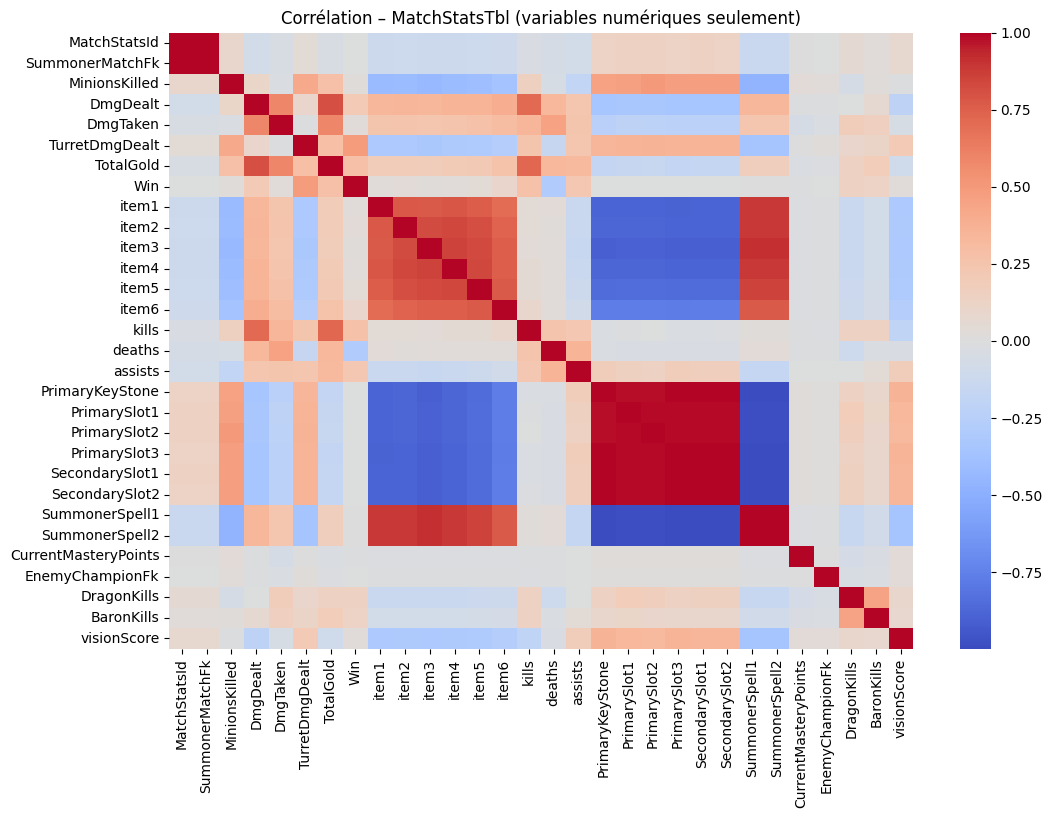

In [65]:
# Calcul de la matrice de corrélation
corr = matchstats_num.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Corrélation – MatchStatsTbl (variables numériques seulement)")
plt.show()


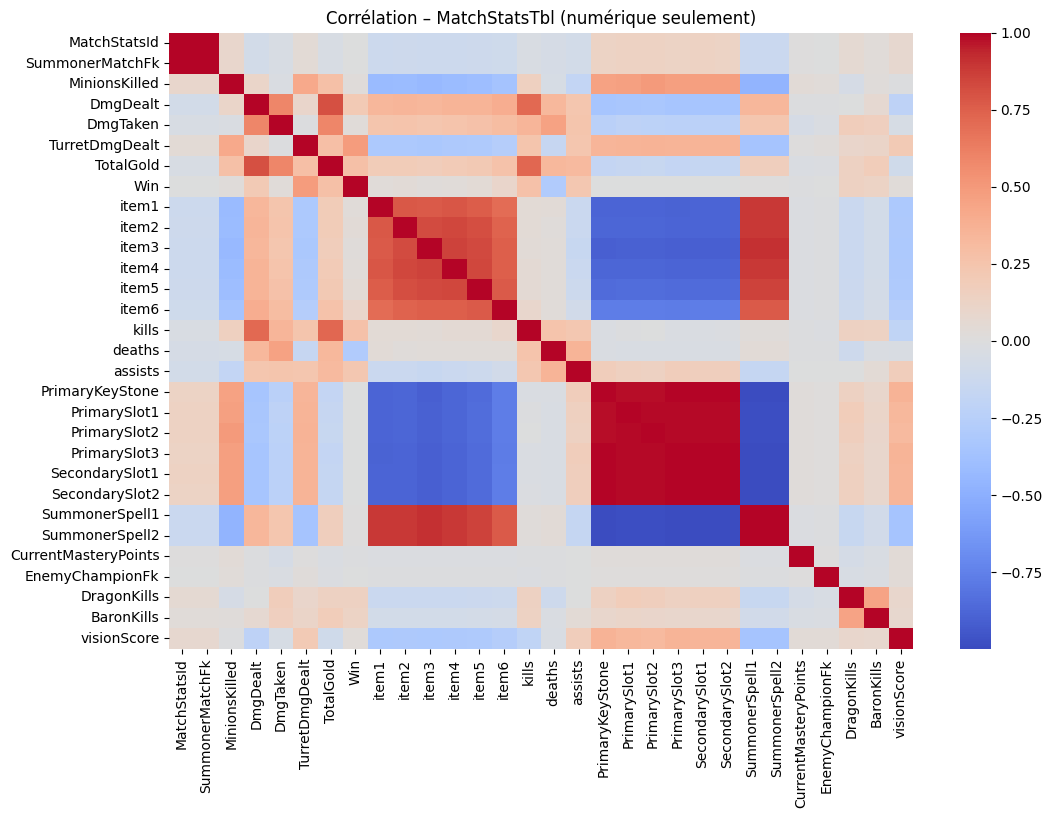

In [66]:
# Sélection des colonnes numériques uniquement
matchstats_num = matchstats.select_dtypes(include="number")

# Calcul de la corrélation propre
plt.figure(figsize=(12,8))
sns.heatmap(matchstats_num.corr(), cmap="coolwarm", annot=False)
plt.title("Corrélation – MatchStatsTbl (numérique seulement)")
plt.show()



# Conclusion

Ce notebook a permis de :

- comprendre la structure du dataset
- analyser les distributions principales
- identifier les valeurs manquantes
- valider les relations entre tables
- préparer les étapes de nettoyage (Notebook 02)

Prochaine étape :  
➡️ fusionner les tables et construire un dataset centralisé pour la modélisation.
